In [1]:
# Imports and scripts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva
    import Graphs as G

%run ../script/GatherData.py

Text(0.5, 1.0, 'Shows the number of files for every label, from JabRef')

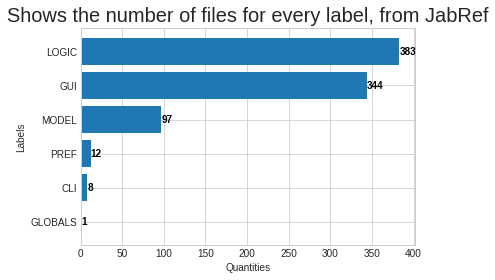

In [2]:
dataset_df = pd.read_csv(str(RP.getRawDataSet()))
y_labels = dataset_df.Label.unique()
x_quantity = [len(dataset_df.loc[dataset_df['Label']==label]) for label in y_labels]
tmp_df = pd.DataFrame({
    'Labels' : y_labels,
    'Quantity' : x_quantity
})
tmp_df = tmp_df.sort_values(by=['Quantity'])
plt.style.use("seaborn-whitegrid")
plt.barh(y=tmp_df.Labels, width=tmp_df.Quantity)
for i, v in enumerate(tmp_df.Quantity):
    plt.text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')

plt.xlabel('Quantities')
plt.ylabel('Labels')
plt.title('Shows the number of files for every label, from JabRef',fontsize = 20)

# Evaluation
The figure above shows the spread of the given concerns and imbalance in the dataset taken from the JabRef architecture.

### Static parts
__Train-test split,__ will be set at 10% for training, and 90% for evaluation.  
* __Metrics,__ the most relevant ones will be the following:  
   * Confusion matrix  
   * Precission  
   * Accuracy  
   * F1-score/value  
   * Average score 
    
----

### Preprocessing settings
```
settings = [
        ['extraction', 'parsing' ... ,'parsing],
        ...,
        ['extraction', 'parsing']
    ]
```
#### Extraction options
* Raw data: 'raw'
* Classes: 'c'
* Public methods: 'pm'
* Public variables/objects: 'pv'
* Import: 'lib'
* Packages: 'pac'
* Comments: 'com'
* Clear commands: 'clear'

#### Parsing options
* Lower case: 'lc'
* Remove single characters:  'sc'
* Remove stop words: 'sw'
* Remove java keywords: 'jk'
* Remove java annotations: 'ja' NOT IMPLEMENTED
* Remove java syntax ('jk','ja','sc'): 'js' NOT IMPLEMENTED
* Remove english stopwords: 'es'
* Remove numbers: 'nu'
* Separate compound words: 'scw'
* Default, then exit preprocess: 'd'
* Clear commands: 'clear'

___

# Testing different test sizes
## static part:
    - feature representation: CountVectorizer
    - PreProcsessing: s1 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'stem'],
    ['pac', 'tow', 'jk'],
    ]
## testing:
    - Test different sample sizes: 5,10,15,20%
    - Train classifier with fix number of files per concern. e.g. 5 GUI, 5 PREF, 5 LOGIC etc..


In [3]:
# Parse the data according to the rules above
settings = [ 
    ['lib', 'tow', 'scw', 'jk', 'lc', 'stem'],
    ['pac', 'tow', 'jk',],
    ['c', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pm', 'tow', 'scw', 'jk', 'lc', 'sw', 'stem'],
    ['pv', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
]
# file to save the result in
basic_file = '../Data/test_size_testing.csv'
basic_df = Prep.preprocess_settings(settings, basic_file)

maxEnt_accuracy_test1 = []
svm_accuracy_test1 = []
naive_accuracy_test1 = []

maxEnt_precision_test1 = []
svm_precision_test1 = []
naive_precision_test1 = []

maxEnt_recall_test1 = []
svm_recall_test1 = []
naive_recall_test1 = []



# Test 1
- Train-size: 10%
- Test-size: 90 %

In [4]:
basic_df = pd.read_csv(basic_file)
# Remove GLOBALS and CLI from the dataset
df_sliced = Eva.filter_unwanted_labels(basic_df, 'Label', ['GLOBALS', 'CLI'])

test_size=0.9
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

# Evaluate

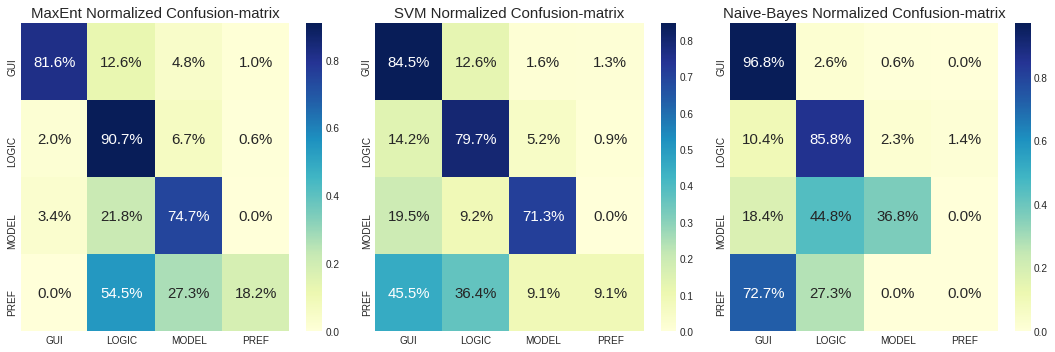

In [5]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

# Classification report

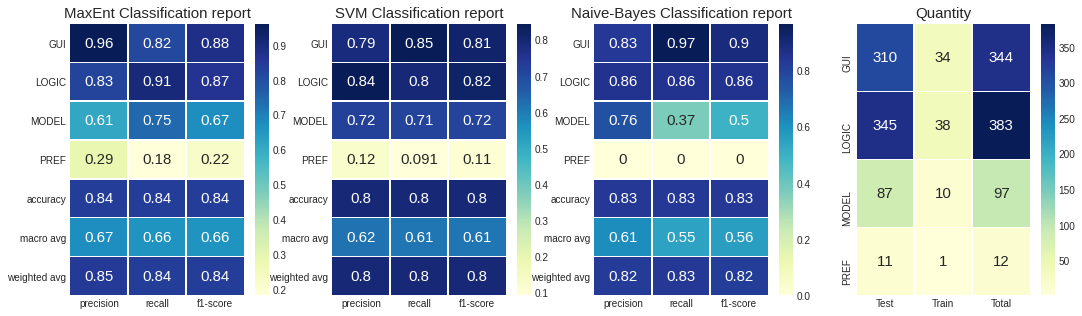

<Figure size 432x288 with 0 Axes>

In [6]:
fig, axis = plt.subplots(1,4, figsize=(18, 5))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
axis[3].set_title("Quantity", fontsize=15)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()


# Prediction averages

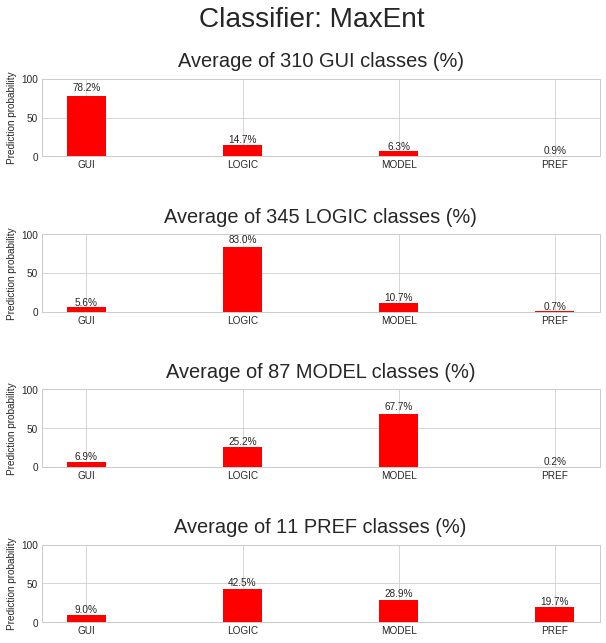

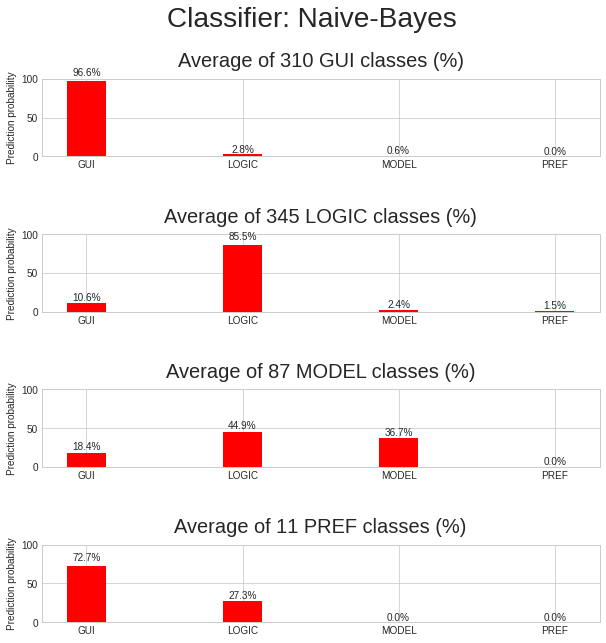

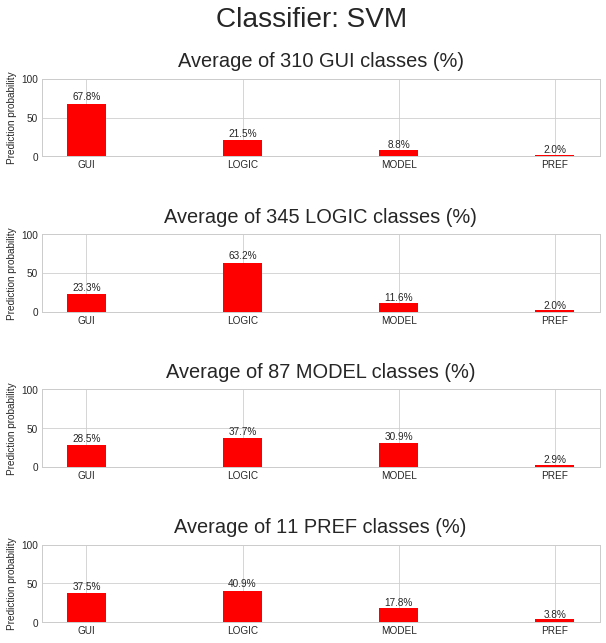

In [7]:
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
metrics_naive.plot_predictionScoreAverage(classifier_naive)
metrics_svm.plot_predictionScoreAverage(classifier_svm)

In [8]:
maxEnt_accuracy_test1.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test1.append(metrics_svm.get_accuracy_score())
naive_accuracy_test1.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test1.append(metrics_max_ent.get_precision_score())
svm_precision_test1.append(metrics_svm.get_precision_score())
naive_precision_test1.append(metrics_naive.get_precision_score())

maxEnt_recall_test1.append(metrics_max_ent.get_recall_score())
svm_recall_test1.append(metrics_svm.get_recall_score())
naive_recall_test1.append(metrics_naive.get_recall_score())

----

# Test 2
- Test size: 85 %
- Train size: 15 %

In [9]:
test_size=0.85
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []

evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

# Evaluation
## Confusion matrix


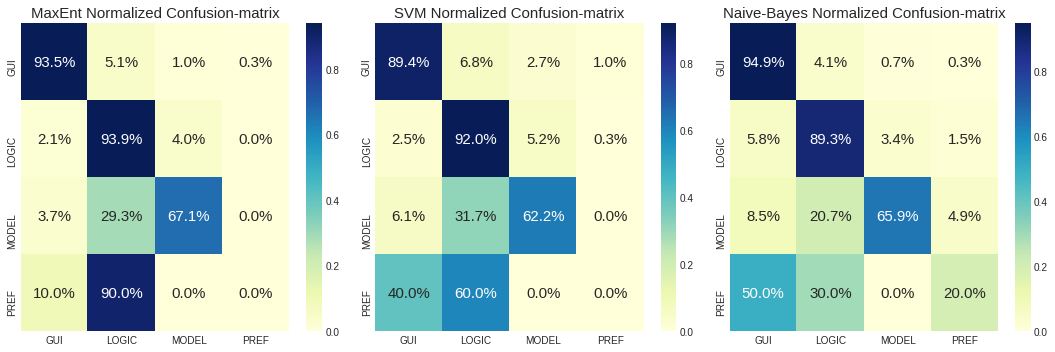

In [10]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

# Classification report

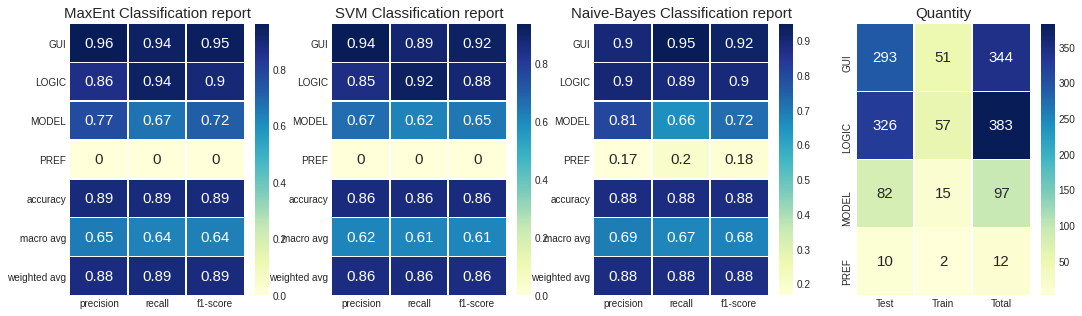

<Figure size 432x288 with 0 Axes>

In [11]:
fig, axis = plt.subplots(1,4, figsize=(18, 5))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
axis[3].set_title("Quantity", fontsize=15)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()

# Prediction average

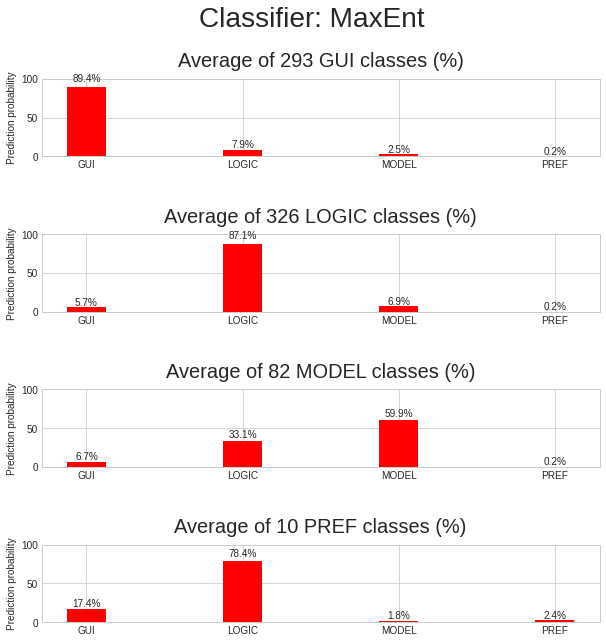

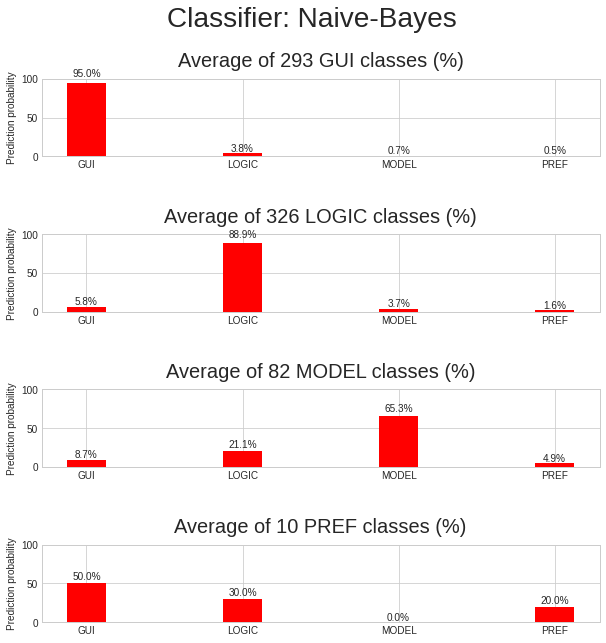

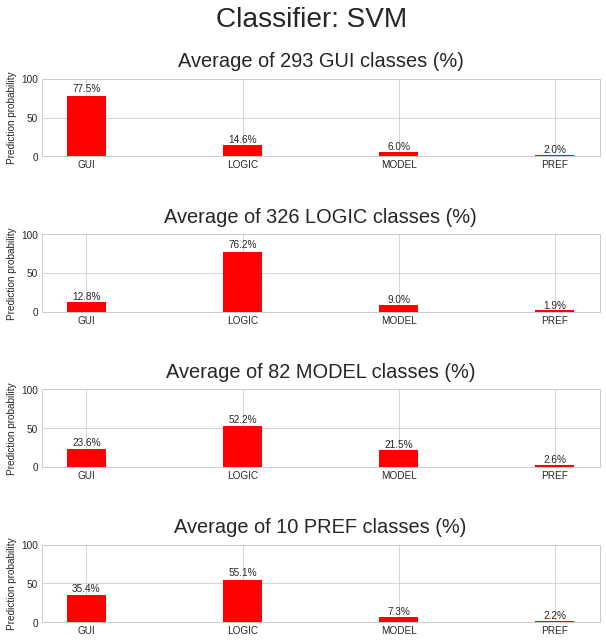

In [12]:
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
metrics_naive.plot_predictionScoreAverage(classifier_naive)
metrics_svm.plot_predictionScoreAverage(classifier_svm)

In [13]:
maxEnt_accuracy_test1.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test1.append(metrics_svm.get_accuracy_score())
naive_accuracy_test1.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test1.append(metrics_max_ent.get_precision_score())
svm_precision_test1.append(metrics_svm.get_precision_score())
naive_precision_test1.append(metrics_naive.get_precision_score())


maxEnt_recall_test1.append(metrics_max_ent.get_recall_score())
svm_recall_test1.append(metrics_svm.get_recall_score())
naive_recall_test1.append(metrics_naive.get_recall_score())

----

# Test 3: Test/Train 80/20 (%)

In [14]:
test_size=0.80
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []

evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

# Evaluation
## Confusion matrix

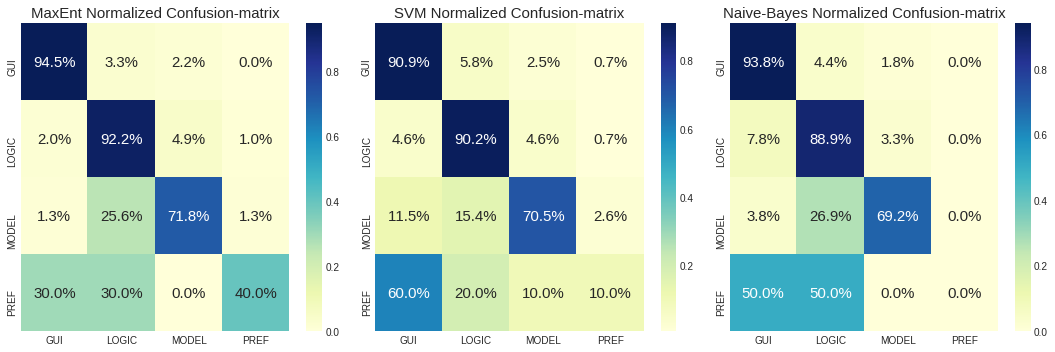

In [15]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

## Classification report

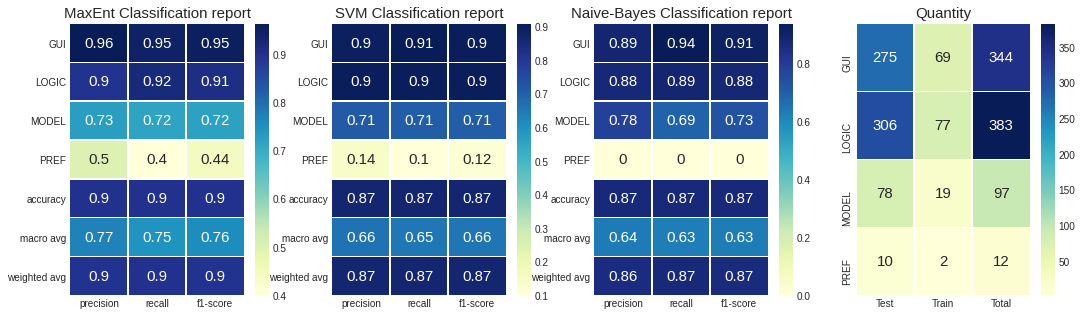

<Figure size 432x288 with 0 Axes>

In [16]:
fig, axis = plt.subplots(1,4, figsize=(18, 5))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
axis[3].set_title("Quantity", fontsize=15)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()

## prediction average

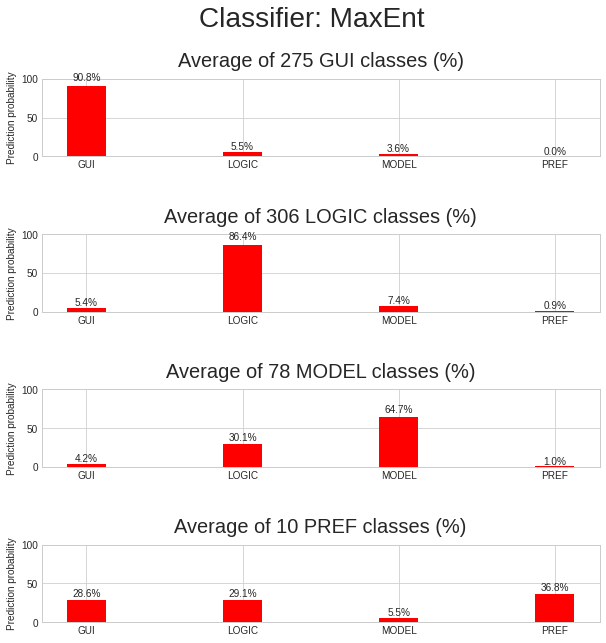

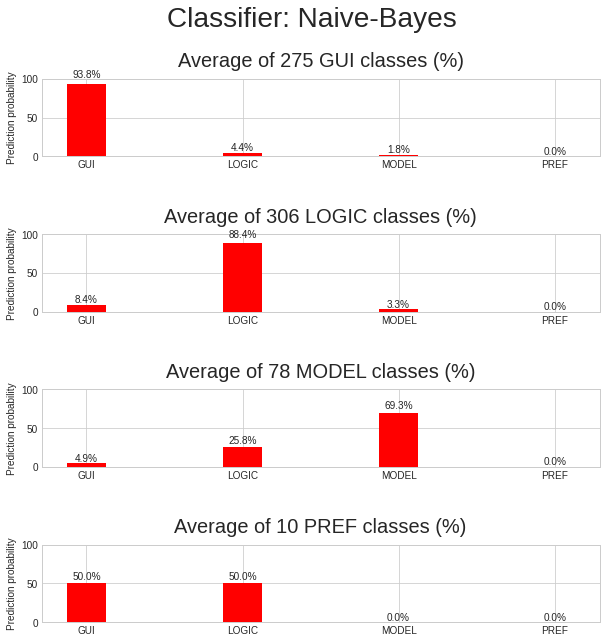

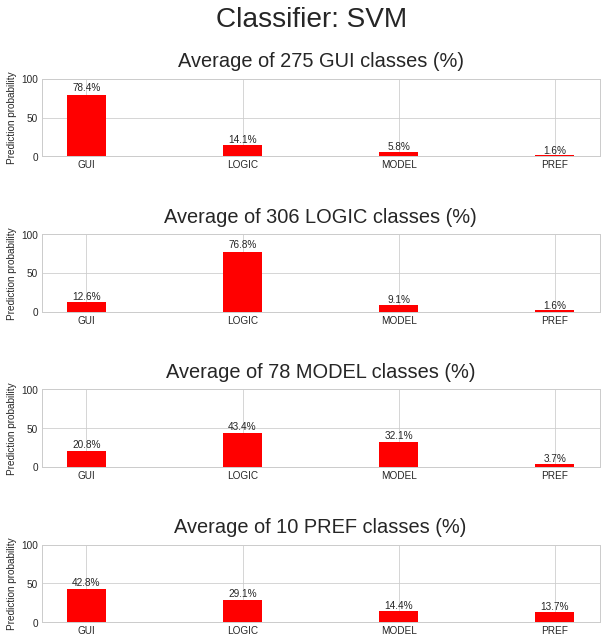

In [17]:
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
metrics_naive.plot_predictionScoreAverage(classifier_naive)
metrics_svm.plot_predictionScoreAverage(classifier_svm)

In [18]:
maxEnt_accuracy_test1.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test1.append(metrics_svm.get_accuracy_score())
naive_accuracy_test1.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test1.append(metrics_max_ent.get_precision_score())
svm_precision_test1.append(metrics_svm.get_precision_score())
naive_precision_test1.append(metrics_naive.get_precision_score())


maxEnt_recall_test1.append(metrics_max_ent.get_recall_score())
svm_recall_test1.append(metrics_svm.get_recall_score())
naive_recall_test1.append(metrics_naive.get_recall_score())

----

# Test 4: Test/Train 75/25 (%)


In [19]:
test_size=0.75
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []

evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

# Evaluation
## Confusion matrix

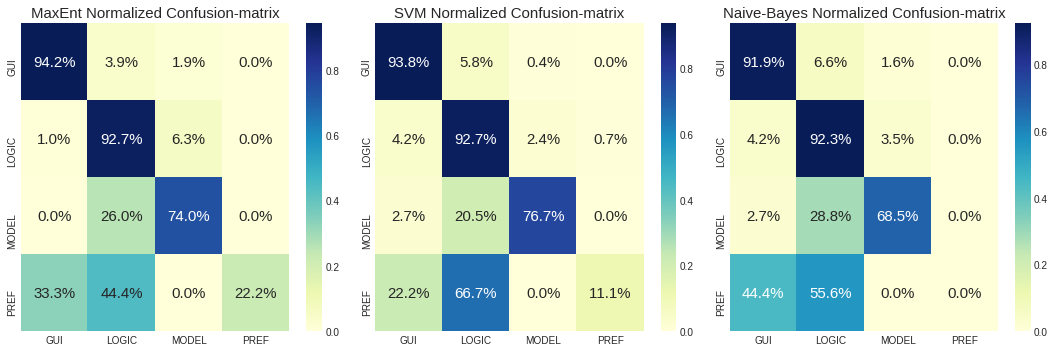

In [20]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

## Classification report

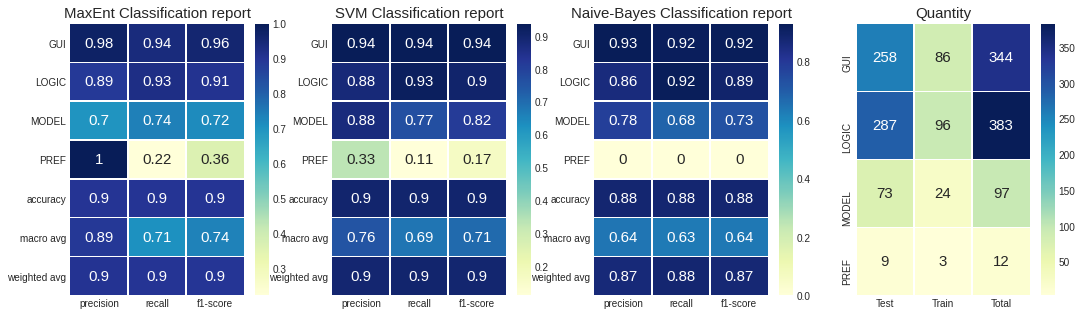

<Figure size 432x288 with 0 Axes>

In [21]:
fig, axis = plt.subplots(1,4, figsize=(18, 5))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
axis[3].set_title("Quantity", fontsize=15)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()

## prediction average

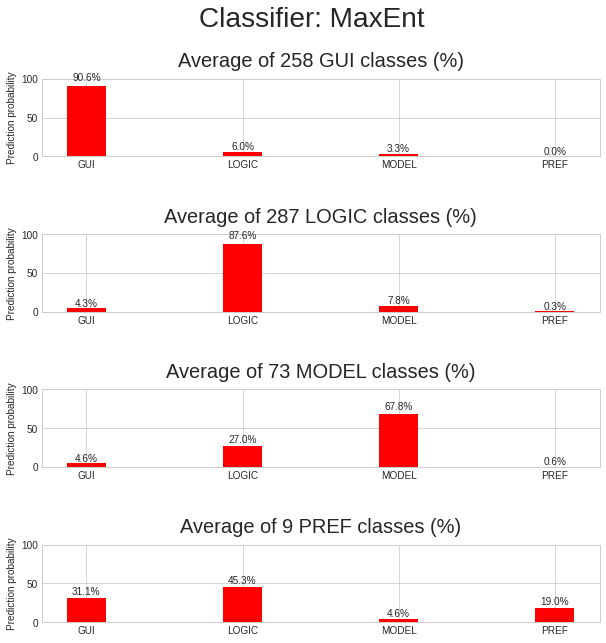

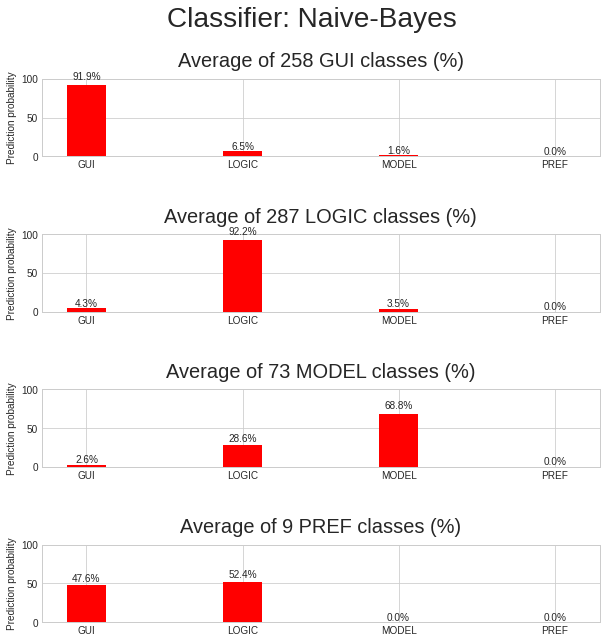

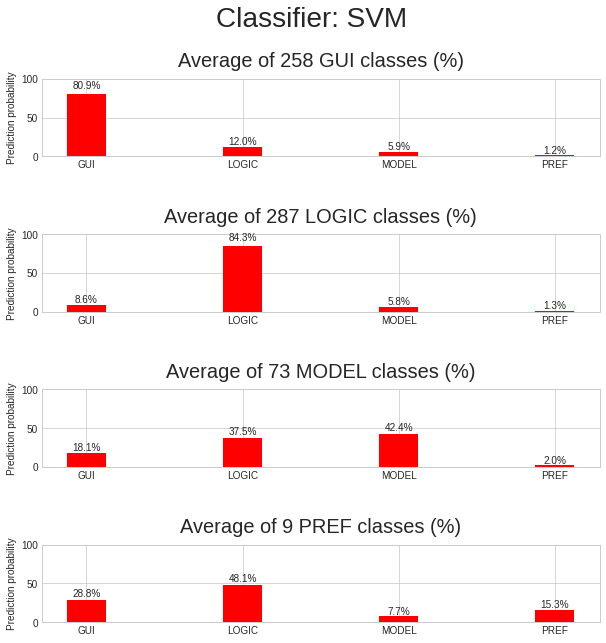

In [22]:
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
metrics_naive.plot_predictionScoreAverage(classifier_naive)
metrics_svm.plot_predictionScoreAverage(classifier_svm)

In [23]:
maxEnt_accuracy_test1.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test1.append(metrics_svm.get_accuracy_score())
naive_accuracy_test1.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test1.append(metrics_max_ent.get_precision_score())
svm_precision_test1.append(metrics_svm.get_precision_score())
naive_precision_test1.append(metrics_naive.get_precision_score())


maxEnt_recall_test1.append(metrics_max_ent.get_recall_score())
svm_recall_test1.append(metrics_svm.get_recall_score())
naive_recall_test1.append(metrics_naive.get_recall_score())

# Overall performance for test_size

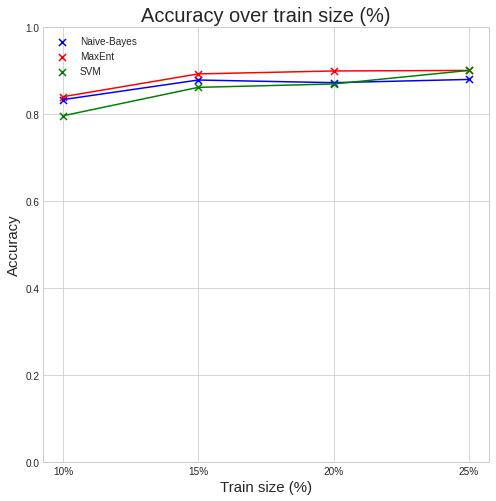

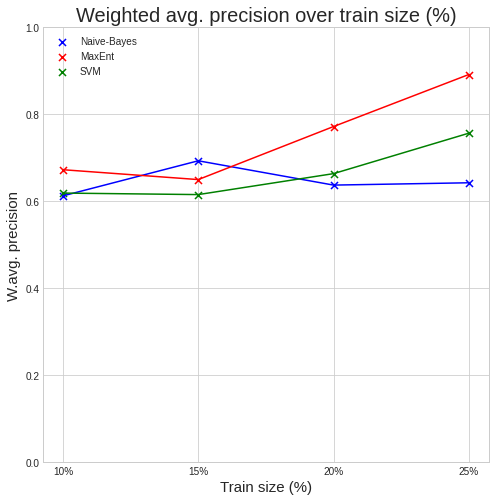

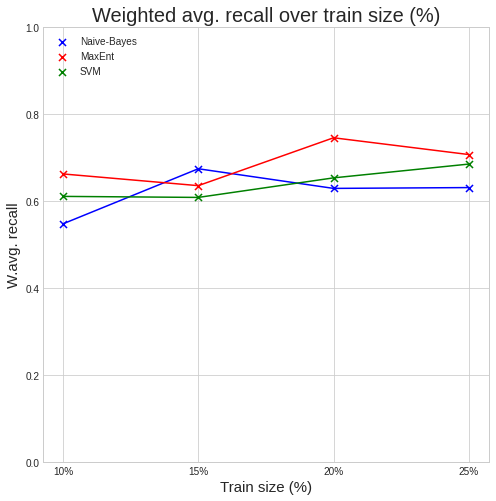

In [24]:
train_size = ['10%','15%','20%','25%']
number_of_files = ['5','10','15','20','25']
y_axis = {
    'naive': naive_accuracy_test1,
    'maxEnt': maxEnt_accuracy_test1,
    'svm': svm_accuracy_test1
}
#########ACCURACY#############################

G.plot_line_graph("Accuracy over train size (%)", train_size, y_axis, "Train size (%)", "Accuracy")
##############################################

##############PRECISION#######################
G.plot_line_graph("Weighted avg. precision over train size (%)", train_size, {'naive': naive_precision_test1,
                                                             'maxEnt': maxEnt_precision_test1,
                                                             'svm': svm_precision_test1
                                                            }, "Train size (%)", "W.avg. precision",)
##############RECALL#######################
G.plot_line_graph("Weighted avg. recall over train size (%)", train_size, {'naive': naive_recall_test1,
                                                             'maxEnt': maxEnt_recall_test1,
                                                             'svm': svm_recall_test1
                                                            }, "Train size (%)", "W.avg. recall",)



